In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime


In [2]:
df = pd.read_csv('dane/AviationData.csv', encoding='ISO-8859-1', dtype={6: str, 7: str, 28: str})
df = df[df['Country'] == 'United States']


In [3]:
# Przekształć 'Event.Date' na typ daty
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Dodanie kolumn dla miesiąca i roku
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month


In [4]:
# Grupowanie według roku i miesiąca, a następnie zliczenie wypadków
df_grouped_monthly = df.groupby(['Year', 'Month']).size().reset_index(name='Number_of_Accidents')

# Dodanie kolumny 'Date' dla ułatwienia sortowania i wizualizacji
df_grouped_monthly['Date'] = pd.to_datetime(df_grouped_monthly[['Year', 'Month']].assign(DAY=1))


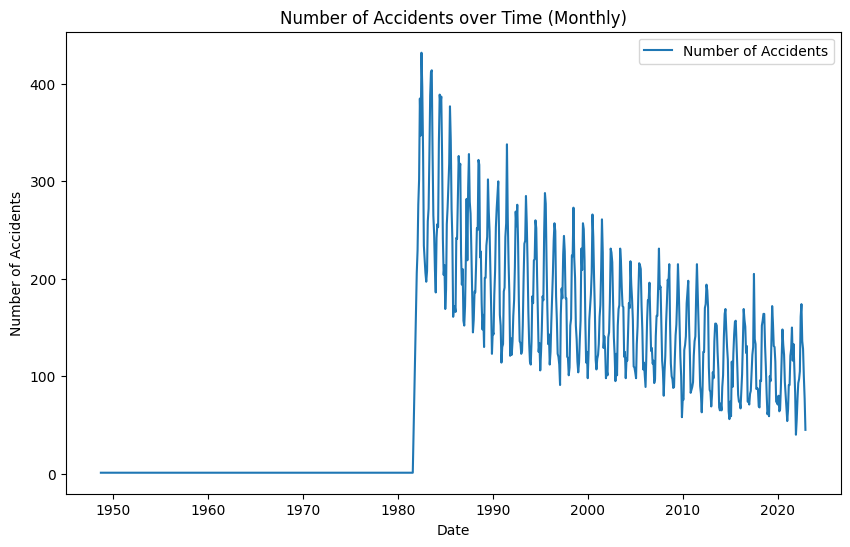

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df_grouped_monthly['Date'], df_grouped_monthly['Number_of_Accidents'], label='Number of Accidents')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents over Time (Monthly)')
plt.legend()
plt.show()


In [6]:
# Grupowanie według roku i zliczenie wypadków
df_grouped_yearly = df.groupby('Year').size().reset_index(name='Number_of_Accidents')


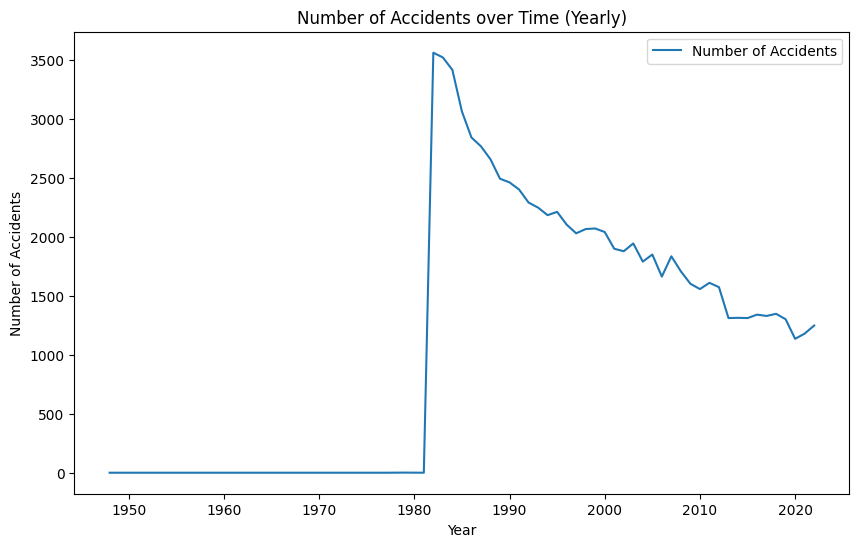

In [7]:
plt.figure(figsize=(10,6))
plt.plot(df_grouped_yearly['Year'], df_grouped_yearly['Number_of_Accidents'], label='Number of Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents over Time (Yearly)')
plt.legend()
plt.show()


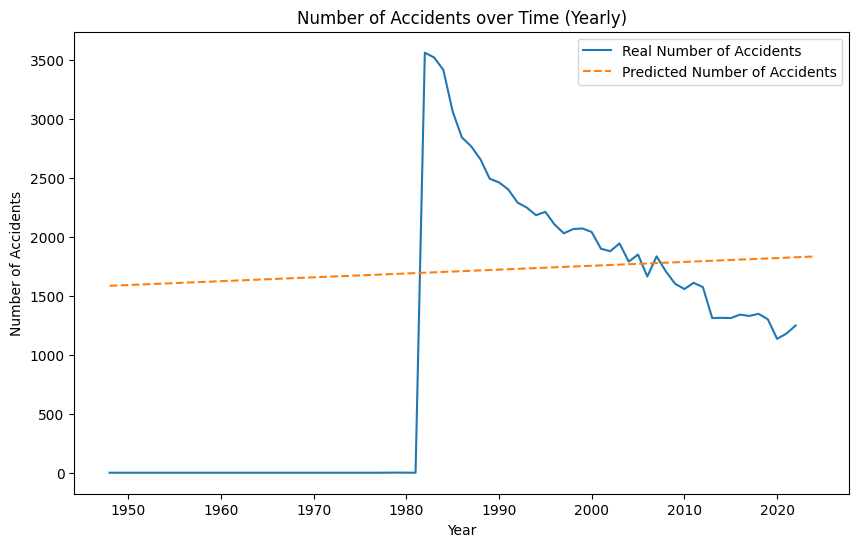

In [8]:
# Wydzielenie zmiennej zależnej i niezależnej
X = df_grouped_yearly[['Year']]  # Zmienna niezależna
y = df_grouped_yearly['Number_of_Accidents']  # Zmienna zależna

# Utworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)

# Przewidywanie liczby wypadków dla lat do 2024 roku
years_future = pd.DataFrame({'Year': range(df_grouped_yearly['Year'].min(), 2025)})  # DataFrame zawierający lata od początkowego roku do 2024
predictions_future = model.predict(years_future)

# Dodanie przewidywań do DataFrame
df_predictions = years_future.assign(Number_of_Accidents=predictions_future)

# Wizualizacja wyników
plt.figure(figsize=(10,6))
plt.plot(df_grouped_yearly['Year'], df_grouped_yearly['Number_of_Accidents'], label='Real Number of Accidents')
plt.plot(df_predictions['Year'], df_predictions['Number_of_Accidents'], linestyle='dashed', label='Predicted Number of Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents over Time (Yearly)')
plt.legend()
plt.show()
